In [ ]:
! pip install pylatexenc
! pip install qiskit

In [1]:
# initialization
import numpy as np
from numpy import pi
from qiskit.tools.jupyter import *
from qiskit.visualization import *

# importing Qiskit
from qiskit import IBMQ, Aer
from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit, assemble, transpile
# from ibm_quantum_widgets import CircuitComposer
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit.tools.visualization import circuit_drawer

# import basic plot tools
from qiskit.visualization import plot_histogram

from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector

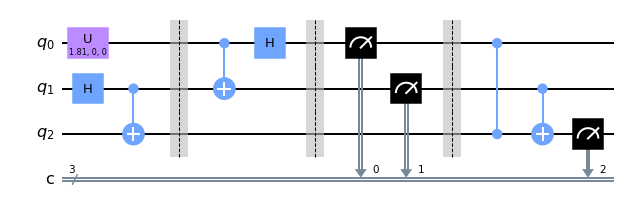

In [5]:
import math
# circuit 1
n = 3
qreg_q = QuantumRegister(n, 'q')
creg_c = ClassicalRegister(n, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

# Prepare state psi of Alice's qubit
circuit.u(pi/math.sqrt(3), 0, 0, 0)

# Prepare bell state between Alice and Bob
circuit.h(1)
circuit.cx(1,2)
circuit.barrier()

# Measure Psi and Alice's qubit using the bell basis
circuit.cx(0,1)
circuit.h(0)
circuit.barrier()
circuit.measure(range(2),range(2))

# Communicate measurement results classically to Bob and apply transformations accordingly:
circuit.barrier()
circuit.cz(0,2)
circuit.cx(1,2)

# Measure teleported qubit in Bob's lab:
circuit.measure(2,2)

circuit.draw('mpl')

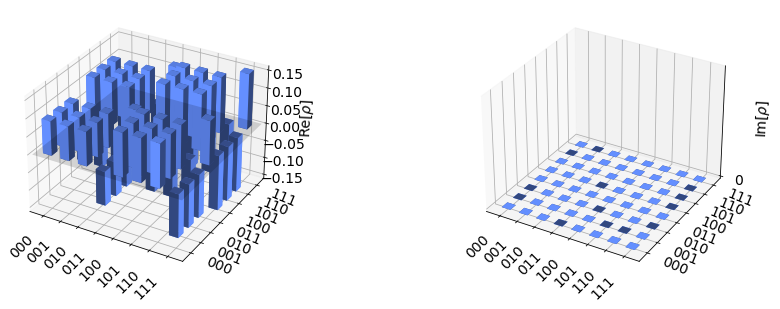

In [3]:
# Print state vector - NOTE: this computes only for circuits w/o a measurement.

# Set the intial state of the simulator to the ground state using from_int
state = Statevector.from_int(0, 2**n)

# # Evolve the state by the quantum circuit
state = state.evolve(circuit)

# #draw using latex
state.draw('city')

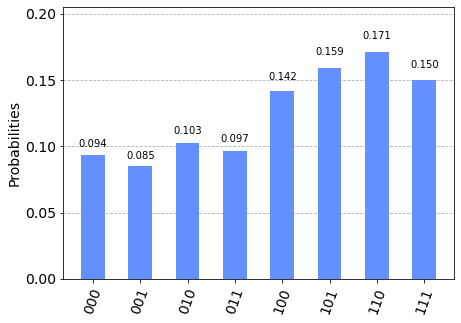

In [6]:
# use local simulator
aer_sim = Aer.get_backend('aer_simulator')
shots = 1024
# shots = 1000000 # max shots
qobj = assemble(circuit, aer_sim, shots=shots)
results = aer_sim.run(qobj).result()
answer = results.get_counts()

plot_histogram(answer)

In [13]:
# Load our saved IBMQ accounts and get the least busy backend device with greater than or equal to (n+1) qubits
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q')
backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= (n) and
                                                         not x.configuration().simulator and x.status().operational==True))
print("least busy backend: ", backend)

least busy backend:  ibmq_armonk


In [34]:
# Run our circuit on the least busy backend. Monitor the execution of the job in the queue
from qiskit.tools.monitor import job_monitor

shots = 1024
transpiled_circuit = transpile(circuit, backend, optimization_level=0)
job = backend.run(transpiled_circuit)
job_monitor(job, interval=2)

Job Status: job has successfully run
